# Fashion MNIST

> Enzo Sergiani


## Imports


In [517]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


from sklearn.metrics import confusion_matrix

## Data


In [518]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [519]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

df_train = pd.DataFrame(
    {
        "Image": [image.flatten() for image in x_train],
        "ClassName": [class_names[label] for label in y_train],
        "ClassNameValue": y_train,
    }
)

df_test = pd.DataFrame(
    {
        "Image": [image.flatten() for image in x_test],
        "ClassName": [class_names[label] for label in y_test],
        "ClassNameValue": y_test,
    }
)

In [520]:
def print_images(data: pd.DataFrame):
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.array(data["Image"][i]).reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(data["ClassName"][i])
    plt.show()

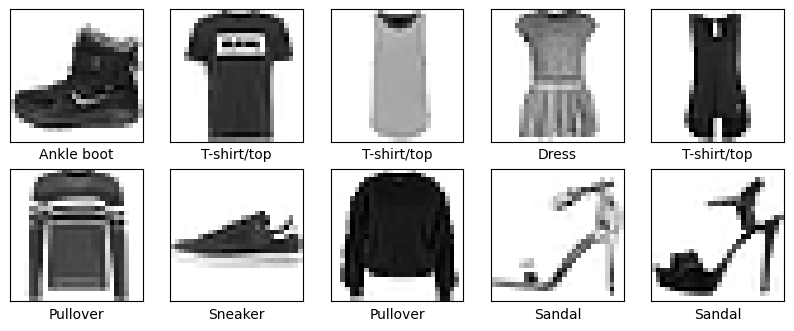

,Image,ClassName,ClassNameValue
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Ankle boot,9
1,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 41, 188, 103, 5...",T-shirt/top,0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 118, 24, 0, 0,...",T-shirt/top,0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 33, 96, 175, 156, 64,...",Dress,3
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",T-shirt/top,0


In [521]:
print_images(df_train)

df_train.head()

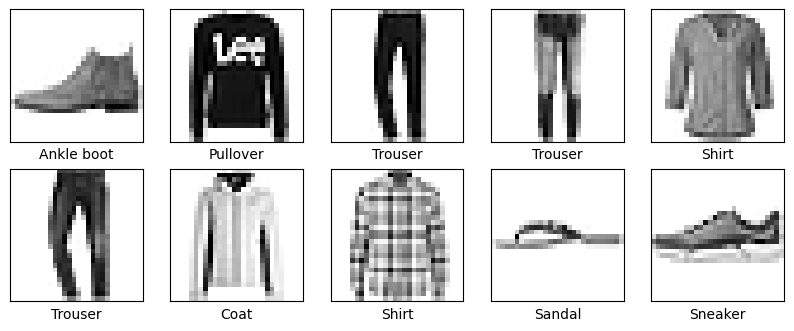

,Image,ClassName,ClassNameValue
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Ankle boot,9
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 67, 0, 0, 0...",Pullover,2
2,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 67, 177, 129, 1...",Trouser,1
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 123, 108, 99, ...",Trouser,1
4,"[0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 57, 67, 73, ...",Shirt,6


In [522]:
print_images(df_test)

df_test.head()

## Model


In [523]:
image_vector_size = df_test["Image"][0].shape
num_classes = df_test["ClassNameValue"].nunique()

In [524]:
model = Sequential()
model.add(Flatten(input_shape=image_vector_size))
model.add(Dense(128, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.summary()

/home/enzo/dev/artificial_intelligence/tp/.env/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [525]:
x_train_array = np.array(df_train["Image"].tolist()).reshape(-1, image_vector_size[0])
x_test_array = np.array(df_test["Image"].tolist()).reshape(-1, image_vector_size[0])

history = model.fit(
    x_train_array,
    df_train["ClassNameValue"],
    batch_size=128,
    epochs=30,
    verbose=0,
    validation_split=0.1,
)

In [526]:
loss, accuracy = model.evaluate(x_test_array, df_test["ClassNameValue"], verbose=0)

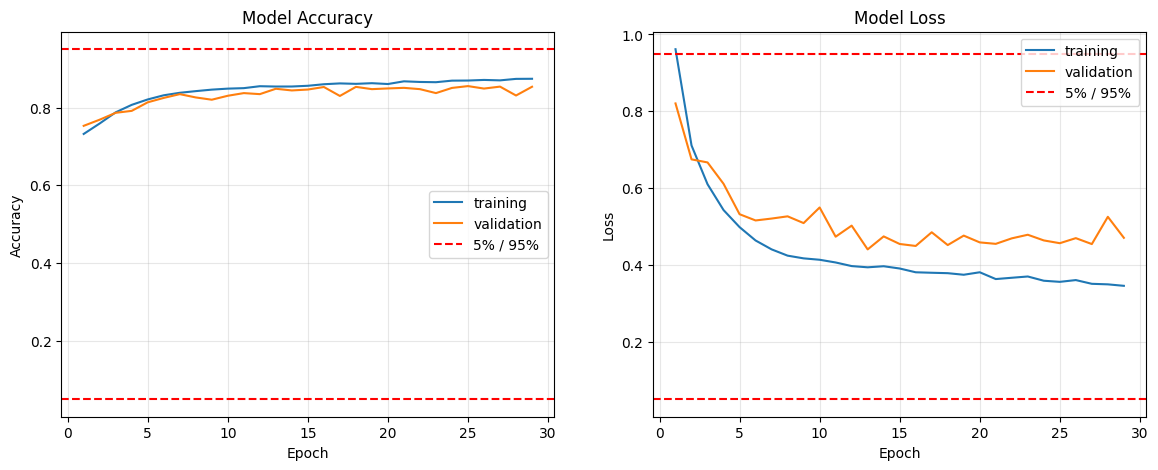

Test accuracy: 0.848
Test loss: 0.482


In [527]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.lineplot(
    data=history.history,
    x=range(1, len(history.history["accuracy"])),
    y=history.history["accuracy"][1:],
    label="training",
    ax=ax[0],
)
sns.lineplot(
    data=history.history,
    x=range(1, len(history.history["val_accuracy"])),
    y=history.history["val_accuracy"][1:],
    label="validation",
    ax=ax[0],
)
ax[0].set_title("Model Accuracy")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy")
ax[0].legend(loc="best")
ax[0].grid(alpha=0.3)
ax[0].axhline(y=0.05, color="red", linestyle="--", label="5% / 95%")
ax[0].axhline(y=0.95, color="red", linestyle="--")
ax[0].legend(loc="best")

sns.lineplot(
    data=history.history,
    x=range(1, len(history.history["loss"])),
    y=history.history["loss"][1:],
    label="training",
    ax=ax[1],
)
sns.lineplot(
    data=history.history,
    x=range(1, len(history.history["val_loss"])),
    y=history.history["val_loss"][1:],
    label="validation",
    ax=ax[1],
)
ax[1].set_title("Model Loss")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].legend(loc="best")
ax[1].grid(alpha=0.3)
ax[1].axhline(y=0.05, color="red", linestyle="--", label="5% / 95%")
ax[1].axhline(y=0.95, color="red", linestyle="--")
ax[1].legend(loc="best")

plt.show()

print(f"Test accuracy: {accuracy:.3}")
print(f"Test loss: {loss:.3}")

## Predictions


In [528]:
predictions = model.predict(x_test_array)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


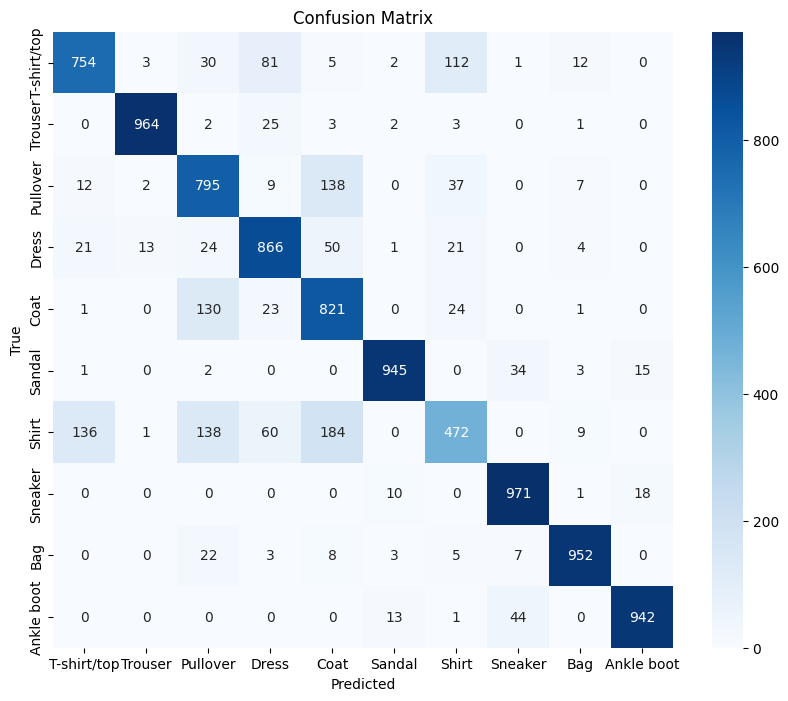

In [529]:
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [533]:
failures = []

for i in range(predictions.shape[0]):
    result = "SUCCESS" if predicted_classes[i] == y_test[i] else "FAILURE"
    color = "\033[92m" if result == "SUCCESS" else "\033[91m"
    reset_color = "\033[0m"
    print(
        f"Predicted: {class_names[predicted_classes[i]]:<12} True: {class_names[y_test[i]]:<12} {color}{result}{reset_color}"
    )
    if result == "FAILURE":
        failures.append((i, predicted_classes[i], y_test[i]))

Predicted: Ankle boot   True: Ankle boot   SUCCESS
Predicted: Pullover     True: Pullover     SUCCESS
Predicted: Trouser      True: Trouser      SUCCESS
Predicted: Trouser      True: Trouser      SUCCESS
Predicted: Shirt        True: Shirt        SUCCESS
Predicted: Trouser      True: Trouser      SUCCESS
Predicted: Coat         True: Coat         SUCCESS
Predicted: Shirt        True: Shirt        SUCCESS
Predicted: Sandal       True: Sandal       SUCCESS
Predicted: Sneaker      True: Sneaker      SUCCESS
Predicted: Coat         True: Coat         SUCCESS
Predicted: Sandal       True: Sandal       SUCCESS
Predicted: Bag          True: Sneaker      FAILURE
Predicted: Dress        True: Dress        SUCCESS
Predicted: Coat         True: Coat         SUCCESS
Predicted: Trouser      True: Trouser      SUCCESS
Predicted: Pullover     True: Pullover     SUCCESS
Predicted: Coat         True: Coat         SUCCESS
Predicted: Bag          True: Bag          SUCCESS
Predicted: T-shirt/top  True: T

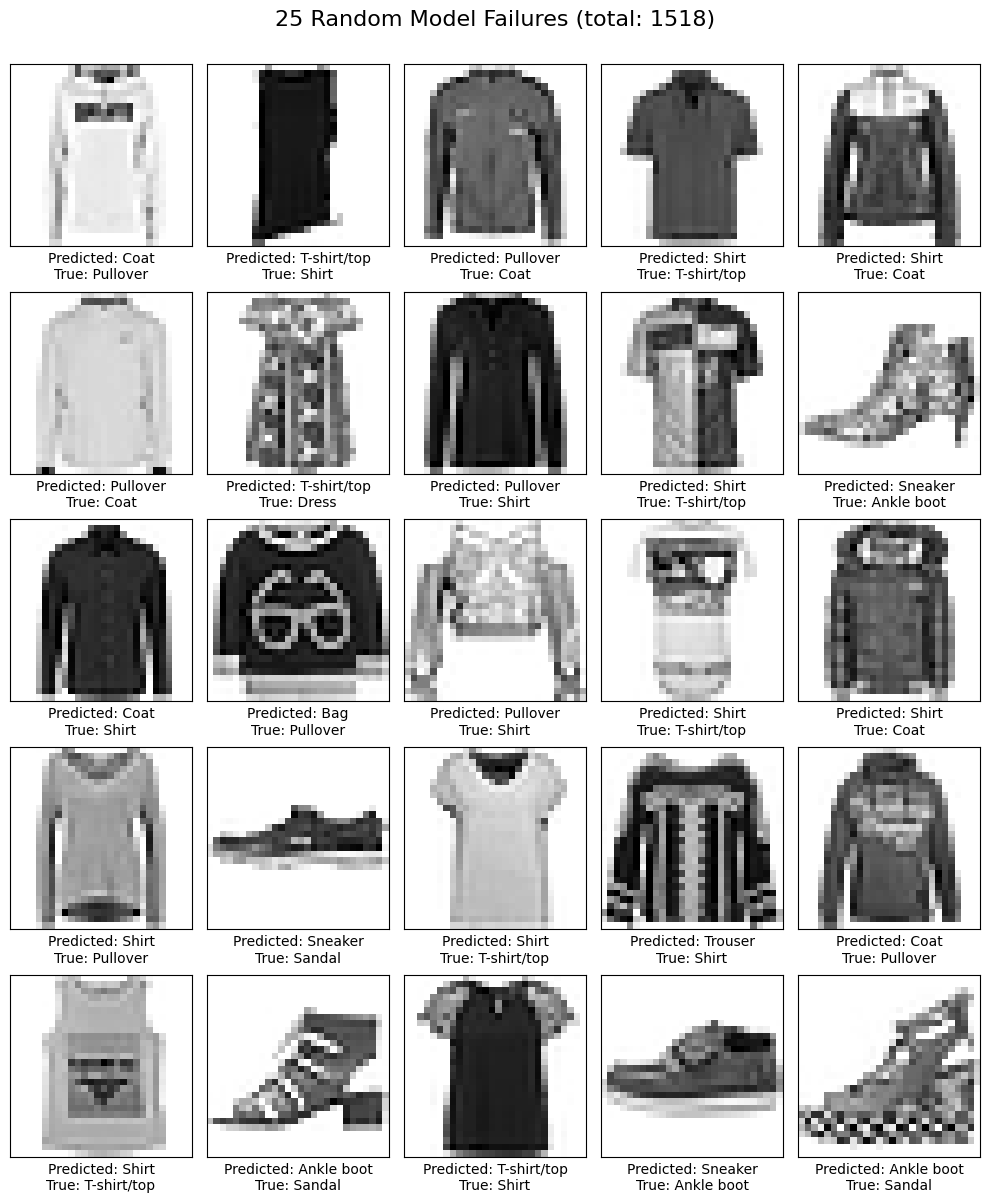

In [534]:
random_failures = random.sample(failures, 25)

plt.figure(figsize=(10, 13))
for i, failure in enumerate(random_failures):
    index, predicted, true = failure
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(x_test[index]), cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {class_names[predicted]}\nTrue: {class_names[true]}")
plt.suptitle(f"25 Random Model Failures (total: {len(failures)})", fontsize=16, y=0.92)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()